This data was computed in another workspace, this is just a copy

In [ ]:
from pymol import cmd

import sys
import pymol
import os
# _stdouterr = sys.stdout, sys.stderr
# pymol.finish_launching(['pymol', '-q'])
# sys.stdout, sys.stderr = _stdouterr

SCRIPT_PATH = '.'
for filename in os.listdir(SCRIPT_PATH):
    if '.pml' in filename:
        cmd.run(F'{SCRIPT_PATH}/{filename}')
    # time.sleep(5)
    cmd.reinitialize()

In [ ]:
import csv
import re
import os
from pymol import cmd
import pandas as pd
from pyvol.pymol_interface import pymol_pocket

path = '..'
asa = []
sasa = []
pocket_rsmds = []
volumes = []
with open('./out/tmp.csv', mode='r')as file:
    csv_file = csv.reader(file, delimiter=';')
    for lines in csv_file:
        key = lines[0]
        holo_key = lines[2]
        files = os.listdir(f'{path}/all-structures')

        apo_filename = [filename for filename in files if (re.search(key.lower(), filename) or re.search(
            key.upper(), filename)) and re.search('_clean_h.pdb', filename)][0]
        holo_filename = [filename for filename in files if (re.search(holo_key.lower(), filename) or re.search(
            holo_key.upper(), filename)) and re.search('_clean_ligand_h.pdb', filename)][0]

        concat = lines[1]
        pocket_len = len(concat.split('+'))
        concat_holo = lines[3]
        if holo_key == '6hbd':
            concat_holo = '28+29+31+32+80+105+106+124+159+163+187+212+213+241+261'
        if holo_key == '1y1a':
            holo_key += 'B'
            key += 'A'
        cmd.reinitialize()
        cmd.load(f'../all-structures/{apo_filename}')

        cmd.load(f'../all-structures/{holo_filename}')

        cmd.remove('organic')
        cmd.remove('inorganic')
        cmd.remove('solvent')

        apo_selection = f'{key} and resi {concat}'
        holo_selection = f'{holo_key} and resi {concat_holo}'

        cmd.set(f'dot_solvent', 'off')
        area_apo = cmd.get_area(apo_selection)
        area_holo = cmd.get_area(holo_selection)
        asa.append((area_apo - area_holo) / pocket_len)

        cmd.set(f'dot_solvent', 'on')
        area_apo = cmd.get_area(apo_selection)
        area_holo = cmd.get_area(holo_selection)
        sasa.append((area_apo - area_holo) / pocket_len)
        try:
            volume_apo = pymol_pocket(protein=key, residue=apo_selection,
                                      ligand=None, prot_file=None, lig_file=None, min_rad=1.4, max_rad=3.4, constrain_radii=True, mode="largest", coordinates=None, resid=None, lig_excl_rad=None, lig_incl_rad=None, min_volume=200, subdivide=False, max_clusters=None, min_subpocket_rad=1.7, max_subpocket_rad=3.4, min_subpocket_surf_rad=1.0, radial_sampling=0.1, inclusion_radius_buffer=1.0, min_cluster_size=50, project_dir=None, output_dir=None, prefix=None, logger_stream_level="INFO", logger_file_level="DEBUG", protein_only=False, display_mode="solid", alpha=1.0, palette=None)[0][0].mesh.volume
            volume_holo = pymol_pocket(protein=holo_key, residue=holo_selection,
                                       ligand=None, prot_file=None, lig_file=None, min_rad=1.4, max_rad=3.4, constrain_radii=True, mode="largest", coordinates=None, resid=None, lig_excl_rad=None, lig_incl_rad=None, min_volume=200, subdivide=False, max_clusters=None, min_subpocket_rad=1.7, max_subpocket_rad=3.4, min_subpocket_surf_rad=1.0, radial_sampling=0.1, inclusion_radius_buffer=1.0, min_cluster_size=50, project_dir=None, output_dir=None, prefix=None, logger_stream_level="INFO", logger_file_level="DEBUG", protein_only=False, display_mode="solid", alpha=1.0, palette=None)[0][0].mesh.volume
            volumes.append((volume_apo - volume_holo) / pocket_len)
        finally:
            pocket_rsmds.append(
                cmd.align(holo_selection, apo_selection, cycles=0))


In [1]:
# precomputed values from different workspace:
import pandas as pd

volumes = [-10.54515142563095, -30.66303010347222, -8.533859859857143, -46.812731678948744, 22.037170845079363, 9.756356551952374, -11.681202530111106, -52.713500410019385, -15.447127366929486, -21.52782549819047, -4.718418326608973, -5.6249907230144816, -17.67143623313333, -3.8762129599999953, 19.71833143063333, 0.4818258905666672, 10.099997025435872, -0.24942020891667008, -18.11006540229762, 18.76906012438595, -7.234021592913579, -9.20093147208695, -12.902140884604165, -16.258449684373346, -10.858320702305555, -0.569389653520839, -44.19225200098148, -2.39988426778787, -63.379556431296315, -34.18281109915789, 15.987333129041694, -38.06433714036458, -33.86401206821904, -17.47655041197312, -42.17544902395454, 4.985712723271909, -15.514753389624996, -2.4764750929924264]
sasa = [18.003890991210938, 11.375475565592447, -1.6863839285714286, 18.62762451171875, 2.496122814360119, -51.227403913225444, 21.701533726283483, 16.033878769985463, -1.7409832294170673, -1.3666469029017858, -4.745168832632212, -7.224359926970108, -5.191105143229167, 1.7673016716452206, 24.658858235677084, 28.887161254882812, 24.028119013859676, -4.663419087727864, 9.162431989397321, 21.996896844161185, 8.747187861689815, 18.67727926503057, -3.57279052734375, -4.85284423828125, 21.401508331298828, 19.158231099446613, 14.722437540690104, 6.912625399502841, 3.9752977159288196, -5.603223298725329, -31.06072998046875, -10.058479309082031, -11.496707589285714, -12.255499070690524, -24.35017811168324, -8.625085127981086, -24.113616943359375, -4.099490079012784]
asa = [1.1557355608258928, 1.37030029296875, -1.4795968191964286, -2.474675105168269, 0.35463169642857145, 1.9308122907366072, 2.9879673549107144, 1.0641805959302326, -3.22314453125, 1.0322846912202381, 0.24259127103365385, 0.9881857167119565, -0.2199462890625, -4.398530847886029, 4.756144205729167, -1.2548177083333334, 0.37350698617788464, -1.1593729654947917, 1.1183849516369047, -3.5749383223684212, 4.240370008680555, 1.754097316576087, -1.2537109375, 10.289326171875, 2.87933349609375, 6.070414225260417, -0.1581488715277778, 0.7840243252840909, 0.1338523582175926, 2.6383249383223686, -1.335601806640625, -3.5056686401367188, 0.21436941964285713, -2.7769027217741935, -1.809326171875, -0.9598452919407895, -5.0023193359375, 1.6564719460227273]
pocket_rsmds_extracted = [1.9325615167617798, 1.3666965961456299, 2.007234811782837, 4.869300842285156, 3.726276397705078, 2.60483717918396, 4.377221584320068, 4.864056587219238, 11.685467720031738, 3.38498854637146, 2.253884792327881, 1.5966910123825073, 2.0441970825195312, 1.6903163194656372, 5.294036388397217, 3.9913699626922607, 2.7528436183929443, 2.617084264755249, 3.195599317550659, 8.758405685424805, 2.7374491691589355, 3.3774197101593018, 3.7631378173828125, 3.4539225101470947, 3.766010046005249, 3.1725552082061768, 2.6888957023620605, 4.576301574707031, 2.2638092041015625, 5.850988388061523, 3.3700854778289795, 2.5096399784088135, 2.2943079471588135, 3.1521079540252686, 2.2119879722595215, 1.4853734970092773, 4.1293044090271, 1.8185052871704102]
# root of n
# sasa = [1.285992213657924, 0.947956297132704, -0.08030399659863946, 0.7164470966045673, 0.11886299116000566, -7.318200559032206, 1.033406367918261, 0.372880901627569, -0.06696089343911797, -0.06507842394770408, -0.18250649356277737, -0.3141026055204395, -0.1730368381076389, 0.10395892186148356, 1.6439238823784723, 1.9258107503255208, 1.8483168472199751, -0.19430912865532768, 0.21815314260469812, 1.1577314128505887, 0.3239699208033265, 0.8120556202187205, -0.08931976318359375, -0.19411376953125, 0.8917295138041178, 0.7982596291436089, 0.8179131967050058, 0.3142102454319473, 0.14723324873810442, -0.29490648940659625, -1.9412956237792969, -0.3143274784088135, -0.32847735969387754, -0.39533867969969433, -2.2136525556075672, -0.4539518488411098, -1.2056808471679688, -0.18634045813694472]
# asa = [0.08255254005899235, 0.11419169108072917, -0.07045699139030612, -0.09517981173724112, 0.016887223639455783, 0.27583032724808676, 0.14228415975765307, 0.024748385951865872, -0.12396709735576923, 0.04915641386763039, 0.009330433501294378, 0.042964596378780716, -0.00733154296875, -0.2587371086991782, 0.31707628038194446, -0.08365451388888889, 0.028731306629068046, -0.04830720689561632, 0.026628213134212018, -0.18815464854570638, 0.1570507410622428, 0.07626510072069943, -0.0313427734375, 0.411573046875, 0.11997222900390625, 0.25293392605251735, -0.008786048418209876, 0.03563746933109504, 0.004957494748799726, 0.13885920728012466, -0.08347511291503906, -0.10955214500427246, 0.00612484056122449, -0.08957750715400624, -0.16448419744318182, -0.05051817326004155, -0.250115966796875, 0.07529417936466942]


In [2]:
INPUT_PATH = '../../data/A-filter-ahojdb-v2'
INPUT_CSV = f'{INPUT_PATH}/pairs.csv'

fields = ['apo_sasa', 'holo_sasa', 'apo_pocket_len', 'apo_asa', 'holo_asa', 'apo_volume', 'holo_volume', 'apo_pocket_rms']
out_df = pd.read_csv(INPUT_CSV, usecols=fields)

4683968


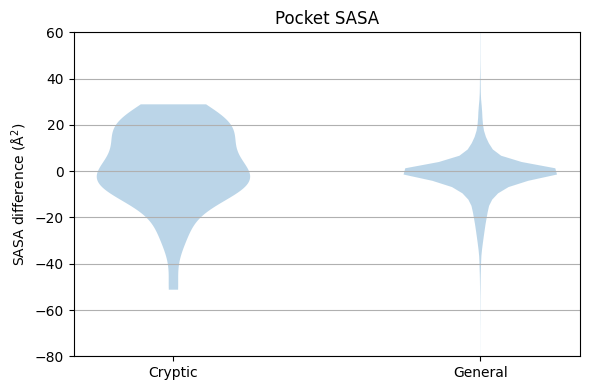

In [13]:
import matplotlib.pyplot as plt
import numpy as np
sasa_difference = (out_df['apo_sasa'] - out_df['holo_sasa']) / out_df['apo_pocket_len'] 
sasa_difference = sasa_difference.dropna()
sasa_difference.to_csv('tmp.csv')
print(len(sasa_difference))
plt.rcParams.update({'figure.autolayout': True})
# axs[0].violinplot(all_data,
#                  showmeans=False,
#                  showmedians=True)
fig, axs = plt.subplots(figsize=(6, 4))

all_data = [sasa, sasa_difference]
x = axs.violinplot(all_data, showextrema=False, points=5000)
# axs.boxplot(all_data, showfliers=False)
axs.set_title('Pocket SASA')
axs.set_ylabel('SASA difference ($\mathregular{Å^2}$)')
axs.yaxis.grid(True)
axs.set_ylim(bottom=-80, top=60)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()


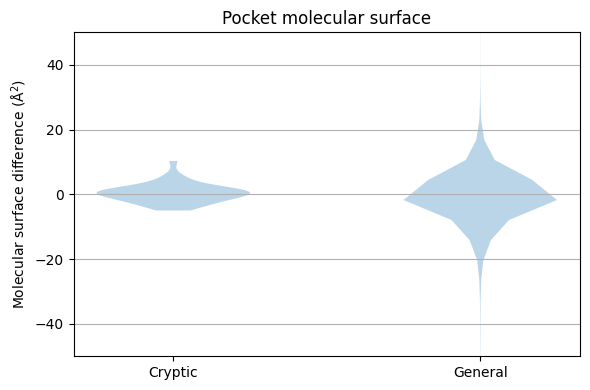

In [12]:

asa_difference = (out_df['apo_asa'] - out_df['holo_asa']) / out_df['apo_pocket_len'] 
asa_difference = asa_difference.dropna()

fig, axs = plt.subplots(figsize=(6, 4))

all_data = [asa, asa_difference]
axs.violinplot(all_data, showextrema=False, points=5000)
axs.set_ylim(bottom=-50, top=50)

axs.set_title('Pocket molecular surface')
axs.set_ylabel('Molecular surface difference ($\mathregular{Å^2}$)')
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()

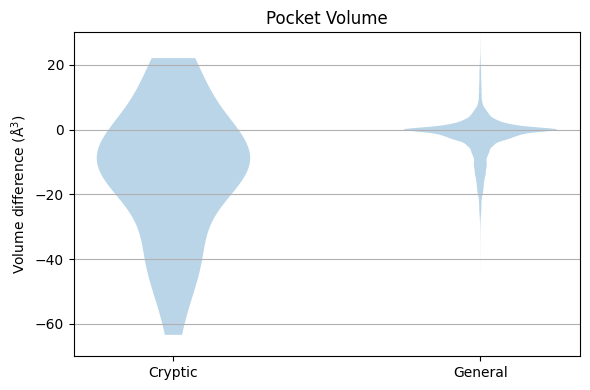

In [14]:
volume_no_errors_df = out_df[(out_df['apo_volume'] != 0) & (out_df['holo_volume'] != 0)]
volume_difference =  (volume_no_errors_df['apo_volume'] - volume_no_errors_df['holo_volume']) / volume_no_errors_df['apo_pocket_len']
volume_difference = volume_difference.dropna()
fig, axs = plt.subplots(figsize=(6, 4))

all_data = [volumes, volume_difference]
axs.violinplot(all_data, showextrema=False, points=5000)
axs.set_ylim(bottom=-70, top=30)

axs.set_title('Pocket Volume')
axs.set_ylabel('Volume difference ($\mathregular{Å^3}$)')
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()


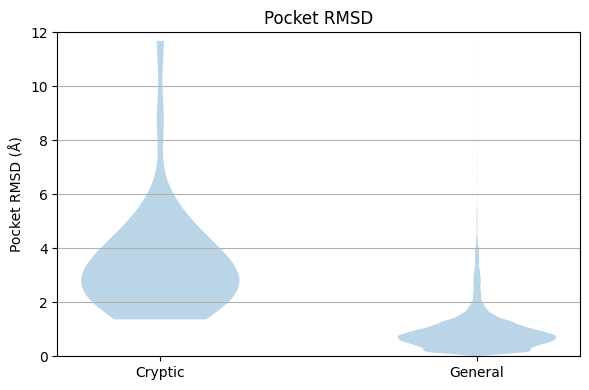

In [16]:
overall_rmsd = out_df['apo_pocket_rms']
fig, axs = plt.subplots(figsize=(6, 4))

all_data = [pocket_rsmds_extracted, overall_rmsd]
axs.violinplot(all_data, showextrema=False, points=5000)
axs.set_ylim(bottom=0, top=12)

axs.set_title('Pocket RMSD')
axs.set_ylabel('Pocket RMSD (Å)')
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()


4683968


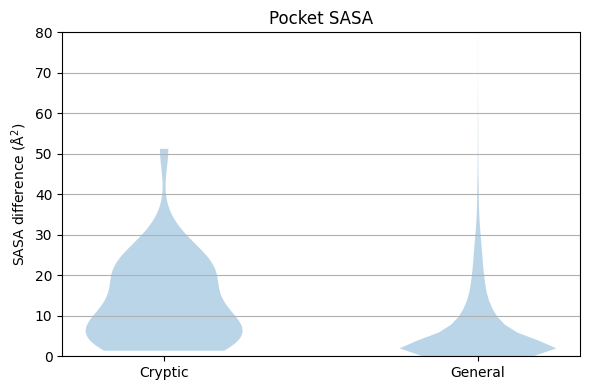

In [4]:
import matplotlib.pyplot as plt
import numpy as np
sasa_difference = abs(out_df['apo_sasa'] - out_df['holo_sasa']) / out_df['apo_pocket_len'] 
sasa_difference = sasa_difference.dropna()
sasa_difference.to_csv('tmp.csv')
print(len(sasa_difference))
plt.rcParams.update({'figure.autolayout': True})
# axs[0].violinplot(all_data,
#                  showmeans=False,
#                  showmedians=True)
fig, axs = plt.subplots(figsize=(6, 4))

abs_sasa = [abs(i) for i in sasa]
all_data = [abs_sasa, sasa_difference]
x = axs.violinplot(all_data, showextrema=False, points=5000)
# axs.boxplot(all_data, showfliers=False)
axs.set_title('Pocket SASA')
axs.set_ylabel('SASA difference ($\mathregular{Å^2}$)')
axs.yaxis.grid(True)
axs.set_ylim(bottom=0, top=80)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()


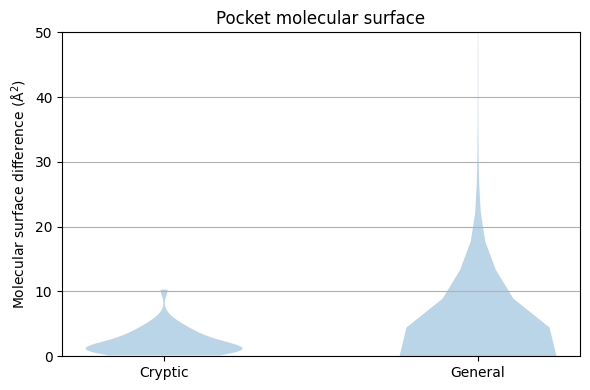

In [6]:

asa_difference = abs(out_df['apo_asa'] - out_df['holo_asa']) / out_df['apo_pocket_len'] 
asa_difference = asa_difference.dropna()

fig, axs = plt.subplots(figsize=(6, 4))
abs_asa = [abs(i) for i in asa]
all_data = [abs_asa, asa_difference]
axs.violinplot(all_data, showextrema=False, points=5000)
axs.set_ylim(bottom=0, top=50)

axs.set_title('Pocket molecular surface')
axs.set_ylabel('Molecular surface difference ($\mathregular{Å^2}$)')
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()

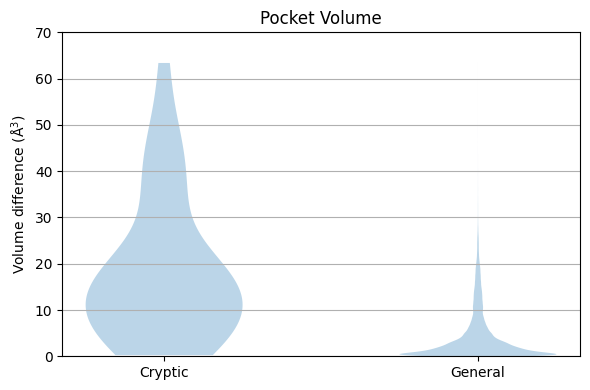

In [5]:
volume_no_errors_df = out_df[(out_df['apo_volume'] != 0) & (out_df['holo_volume'] != 0)]
volume_difference =  abs(volume_no_errors_df['apo_volume'] - volume_no_errors_df['holo_volume']) / volume_no_errors_df['apo_pocket_len']
volume_difference = volume_difference.dropna()
fig, axs = plt.subplots(figsize=(6, 4))

abs_volumes = [abs(i) for i in volumes]
all_data = [abs_volumes, volume_difference]
axs.violinplot(all_data, showextrema=False, points=5000)
axs.set_ylim(bottom=0, top=70)

axs.set_title('Pocket Volume')
axs.set_ylabel('Volume difference ($\mathregular{Å^3}$)')
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
               labels=['Cryptic', 'General'])
plt.show()
